
# Lorenz 63 Model and Volume Dissipation

This notebook explores the Lorenz 63 model, a simple yet powerful model in the study of nonlinear dynamical systems. The Lorenz 63 model is a system of three ordinary differential equations originally derived by Edward Lorenz in 1963 as a simplified mathematical model for atmospheric convection. 

The equations are given by:

$$
\frac{dx}{dt} = \sigma (y - x)
$$

$$
\frac{dy}{dt} = x(\rho - z) - y
$$

$$
\frac{dz}{dt} = xy - \beta z
$$

Where:
- \(x\), \(y\), and \(z\) represent the state of the system at any given time.
- \($\sigma$\) is the Prandtl number.
- \($\rho$\) is the Rayleigh number.
- \($\beta$\) is a geometric factor.

In this notebook, we will also focus on the concept of volume dissipation, which relates to the divergence of the flow in the phase space. The divergence gives insight into the behavior of volumes of initial conditions as they evolve over time. For example, in chaotic systems like the Lorenz 63 model, volumes typically contract, indicating dissipative dynamics.

This notebook is intended for learners who are beginning to explore nonlinear dynamical systems and wish to understand the Lorenz 63 model more deeply.



## Define the Lorenz 63 System

The following code defines the Lorenz 63 system using the standard parameters. We use the `odeint` function from `scipy.integrate` to solve the system of ODEs over time.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

### Define the Lorenz system

In [5]:
def lorenz(state, t, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]


## Plotting the Results

The final section of the notebook generates plots of the Lorenz system's state variables (x, y, z) over time and the divergence. This visualization helps in understanding the dynamic behavior of the system.


### Jacobian of the Lorenz system

In [6]:
def jacobian(state, sigma, rho, beta):
    x, y, z = state
    return np.array([
        [-sigma, sigma, 0],
        [rho - z, -1, -x],
        [y, x, -beta]
    ])

### Initial conditions and parameters

In [7]:
initial_state = [1.0, 1.0, 1.0]
sigma, rho, beta = 10, 28, 8/3
t = np.linspace(0, 10, 1000)

### Time integration of the Lorenz system

In [8]:
trajectory = odeint(lorenz, initial_state, t, args=(sigma, rho, beta))


## Calculate the Divergence of the Lorenz System

The divergence of the Lorenz system is computed here. The divergence provides information about the rate at which volume elements in the phase space expand or contract.


Compute the determinant of the Jacobian (divergence) along the trajectory

In [9]:
divergence = [np.linalg.det(jacobian(state, sigma, rho, beta)) for state in trajectory]

### Plotting

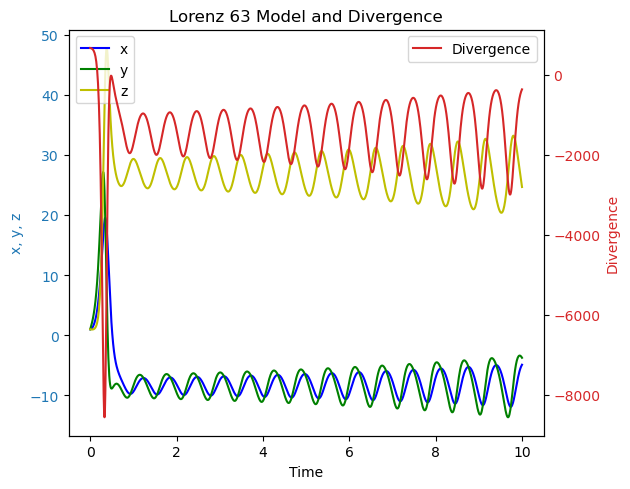

In [10]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('x, y, z', color=color)
ax1.plot(t, trajectory[:, 0], label='x', color='b')
ax1.plot(t, trajectory[:, 1], label='y', color='g')
ax1.plot(t, trajectory[:, 2], label='z', color='y')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Divergence', color=color)
ax2.plot(t, divergence, color=color, label='Divergence')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()
plt.title('Lorenz 63 Model and Divergence')
plt.show()